In [1]:
# Import modules
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import preprocessing

In [4]:
# let's set some visualization parameters in order to have same plots size for visualizations. 
plt.rcParams['figure.figsize'] = [14,10]
sns.set_style('darkgrid')

In [5]:
cd C:\\Users\\hp\\Desktop\\Jupyter_Notebook\\ML_Stats

C:\Users\hp\Desktop\Jupyter_Notebook\ML_Stats


In [6]:
emp_attrition = pd.read_csv('Capstone/HR_Employee_Attrition_Data.csv')

In [6]:
emp_attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,...,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,...,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2938,...,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,...,4,80,0,17,3,2,9,6,0,8


# BASIC DATA CLEANING

In [7]:
emp_attrition.info()

# no null values in any column. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [40]:
# DELETING DUPLICATES

emp_attrition.drop_duplicates(subset = None, keep = False, ignore_index = True, inplace = True )

In [39]:
emp_attrition.info()

# no change in no. of rows, hence there are no duplicate entries in data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [46]:
# Confirming constant variables according to problem statement document. 

print(emp_attrition['EmployeeCount'].nunique())
print(emp_attrition['EmployeeCount'].var())

print(emp_attrition['Over18'].nunique())
# Categorical variable, variance cannot be calculated.

print(emp_attrition['StandardHours'].nunique())
print(emp_attrition['StandardHours'].var())

# INSIGHT - ALL THESE COLUMNS ARE CONSTANT, ZERO VARIANCE COLUMNS. WE CAN REMOVE THEM FROM THE DATASET. 

1
0.0
1
1
0.0


In [7]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = emp_attrition.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,nan,-0.005175,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,nan,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,nan,-0.025742,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,nan,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,nan,0.016464,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,nan,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,nan,0.020950,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,nan,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EmployeeNumber,-0.005175,-0.025742,0.016464,0.020950,nan,1.000000,0.008712,0.017377,-0.003552,-0.009020,-0.022970,-0.007188,0.006177,-0.000345,-0.006685,-0.010338,-0.034827,nan,0.031226,-0.007047,0.011953,0.005370,-0.005779,-0.004427,-0.004575,-0.004716
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,nan,0.008712,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,nan,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,nan,0.017377,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,nan,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,nan,-0.003552,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,nan,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,nan,-0.009020,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,nan,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


## DROPPING COLUMNS

In [7]:
# list of correlated columns which we shall drop:
    # 1. MonthlyIncome
    # 2. TotalWorkingYears
    # 3. PerformanceRating
    # 4. YearsWithCurrManager
    # 5. YearsInCurrentRole

# list of constant columns which we shall drop:
    # 1. EmployeeCount
    # 2. Over18
    # 3. StandardHours

# List of personal identification information columns we will drop:
    # 1. EmployeeNumber

emp_attrition.drop(columns = ['MonthlyIncome', 'TotalWorkingYears', 'PerformanceRating', 
                              'YearsWithCurrManager', 'YearsInCurrentRole', 
                              'EmployeeCount', 'Over18', 'StandardHours',
                              'EmployeeNumber'], inplace = True)

In [8]:
# Rechecking if there are anymore correlated features. 

corr = emp_attrition.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
Age,1.00,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,0.03,0.30,0.00,0.05,0.04,-0.02,-0.02,0.31,0.22
DailyRate,0.01,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,-0.03,0.04,0.02,0.01,0.04,0.00,-0.04,-0.03,-0.03
DistanceFromHome,-0.00,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,0.03,-0.03,0.04,0.01,0.04,-0.04,-0.03,0.01,0.01
Education,0.21,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,-0.03,0.13,-0.01,-0.01,0.02,-0.03,0.01,0.07,0.05
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,0.04,0.01,-0.03,0.01,0.00,-0.02,0.03,0.00,0.02
HourlyRate,0.02,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,-0.02,0.02,-0.01,0.00,0.05,-0.01,-0.00,-0.02,-0.03
JobInvolvement,0.03,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,-0.02,0.02,-0.02,0.03,0.02,-0.02,-0.01,-0.02,-0.02
JobLevel,0.51,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,0.04,0.14,-0.03,0.02,0.01,-0.02,0.04,0.53,0.35
JobSatisfaction,-0.00,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,0.00,-0.06,0.02,-0.01,0.01,-0.01,-0.02,-0.00,-0.02
MonthlyRate,0.03,-0.03,0.03,-0.03,0.04,-0.02,-0.02,0.04,0.00,1.00,0.02,-0.01,-0.00,-0.03,0.00,0.01,-0.02,0.00


In [8]:
emp_attrition.shape

# 25 feature columns, 1 Target Column

(2940, 26)

## Label Encoding Target Variable

In [9]:
le = preprocessing.LabelEncoder()
emp_attrition.Attrition = le.fit_transform(emp_attrition.Attrition.values)

# In Attrition column: 'Yes' has been labelled as 1; 'No' has been labelled as 0

In [12]:
emp_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,19479,8,Yes,11,1,0,0,1,6,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,24907,1,No,23,4,1,3,3,10,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2396,6,Yes,15,2,0,3,3,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,23159,1,Yes,11,3,0,3,3,8,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,16632,9,No,12,4,1,3,3,2,2


474


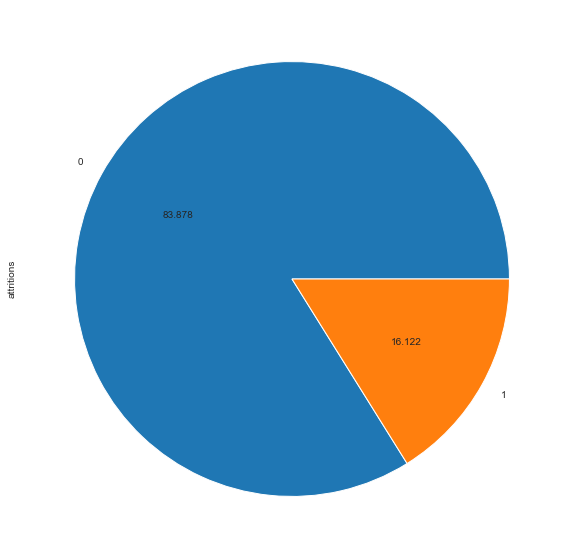

In [11]:
emp_attrition.groupby('Attrition').size().plot(kind = 'pie', label = 'attritions', autopct = '%.3f')

print(emp_attrition['Attrition'].sum())

# DATA FILTERING

## BusinessTravel

<AxesSubplot:ylabel='Frequency'>

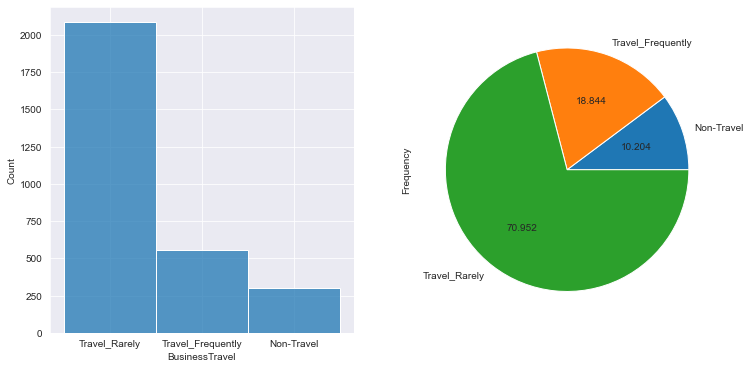

In [68]:
# Categorical Data

plt.subplot(1,2,1)
sns.histplot(data = emp_attrition, x = 'BusinessTravel')

plt.subplot(1,2,2)
emp_attrition.groupby('BusinessTravel').size().plot(kind = 'pie', label = 'Frequency', autopct = '%.3f')

In [79]:
# Checking % of attritions for BusinessTravel == Travel_Frequently | Non-Travel which is 29% of the total data.

emp_attrition.loc[emp_attrition['BusinessTravel']!='Travel_Rarely']['Attrition'].sum()*100/474

# 34.1% of total 16% are happening for BusinessTravel = Travel_Frequently | Non-Travel.
# We cannot filter out this data. It will provide information to the model. 

34.177215189873415

## Department

(2940,)


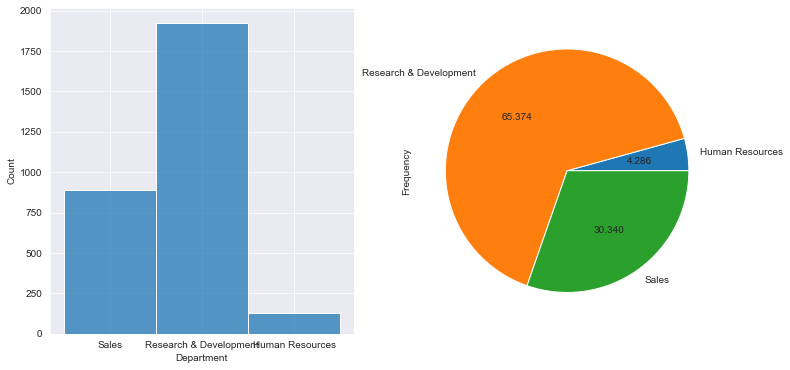

In [29]:
# Categorical Data

plt.subplot(1,2,1)
sns.histplot(data = emp_attrition, x = 'Department')

plt.subplot(1,2,2)
emp_attrition.groupby('Department').size().plot(kind = 'pie', label = 'Frequency', autopct = '%.3f')

print(emp_attrition.Department.shape)

In [87]:
# Checking % of attritions for Department == Human Resourceson-Travel which is 4.3% of the total data of the column.

print('% of total attritions = ', emp_attrition.loc[emp_attrition['Department'] == 'Human Resources']['Attrition'].sum()*100/474)

# 5% of total attritions happening in Human Resources Department. 
# No substantial information gain for these records. We should filter out this 4.3% data. 

% of total attritions =  5.063291139240507


## Education

(2940,)


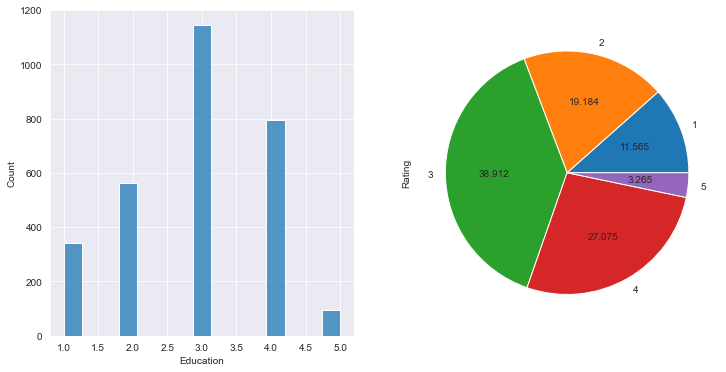

In [49]:
# ordinal Data - rating from 1 -5

plt.subplot(1,2,1)
sns.histplot(data = emp_attrition, x = 'Education')

plt.subplot(1,2,2)
emp_attrition.groupby('Education').size().plot(kind = 'pie', label = 'Rating', autopct = '%.3f')

print(emp_attrition.Education.shape)

In [88]:
for x in [1, 2, 3, 4, 5]:

    print(f'%age of total attritions = {x}',
           emp_attrition.loc[emp_attrition['Education']== x]['Attrition'].sum()*100/474)

# 2% of total attritions of employees for Education Rating == 5.
# No substantial gain for the model. We should filter out this data. 

%age of total attritions = 1 13.080168776371307
%age of total attritions = 2 18.565400843881857
%age of total attritions = 3 41.77215189873418
%age of total attritions = 4 24.47257383966245
%age of total attritions = 5 2.109704641350211


## EducationField

(2940,)


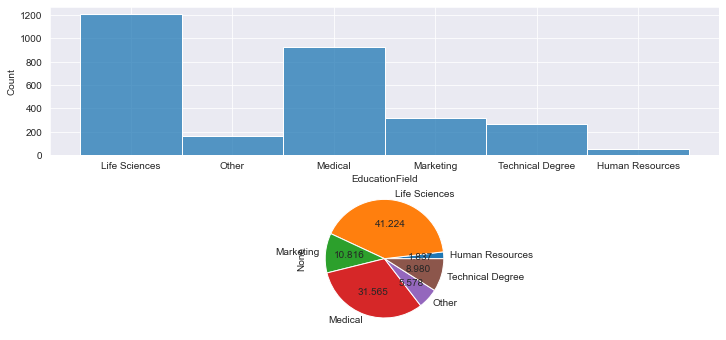

In [48]:
# Categorical Data

plt.subplot(2,1,1)
sns.histplot(data = emp_attrition, x = 'EducationField')

plt.subplot(2,1,2)
emp_attrition.groupby('EducationField').size().plot(kind = 'pie', autopct = '%.3f')

print(emp_attrition.EducationField.shape)

In [90]:
for x in ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources', 'Other']:

    print(f'%age of total attritions = {x}',
        emp_attrition.loc[emp_attrition['EducationField']== x]['Attrition'].sum()*100/474)

# 2.9% of total attritions for EducationField == Human Resources.
# No substantial gain for the model. We should filter out this data. 

%age of total attritions = Life Sciences 37.552742616033754
%age of total attritions = Medical 26.582278481012658
%age of total attritions = Marketing 14.767932489451477
%age of total attritions = Technical Degree 13.50210970464135
%age of total attritions = Human Resources 2.9535864978902953
%age of total attritions = Other 4.641350210970464


## EnvironmentSatisfacton

(2940,)


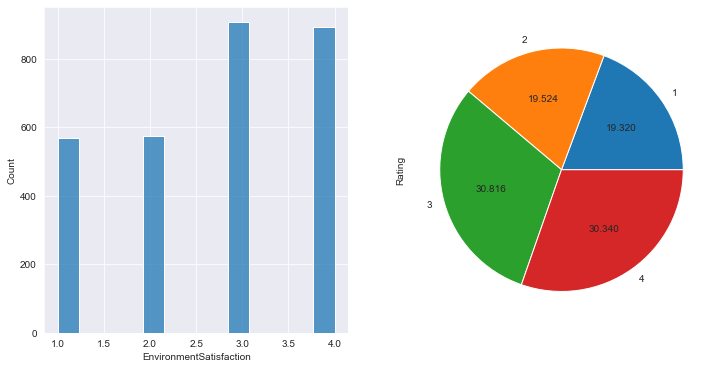

In [53]:
# ordinal data 

plt.subplot(1,2,1)
sns.histplot(data = emp_attrition, x = 'EnvironmentSatisfaction')

plt.subplot(1,2,2)
emp_attrition.groupby('EnvironmentSatisfaction').size().plot(kind = 'pie', label = 'Rating', autopct = '%.3f')

print(emp_attrition.EnvironmentSatisfaction.shape)

# INSIGHT - EVERY DATA VALUE HAS SUFFICIENT FREQUENCY IN THE DATASET. NO ACTION NEEDED.

In [92]:
for x in [1,2,3,4]:
    print(f'%age of total attritions = {x}:',
           emp_attrition.loc[emp_attrition['JobInvolvement']== x]['Attrition'].sum()*100/474)
    
# INSIGHT - Substantial Attritions for each value. No action needed. 

%age of total attritions = 1: 11.814345991561181
%age of total attritions = 2: 29.957805907172997
%age of total attritions = 3: 52.742616033755276
%age of total attritions = 4: 5.485232067510548


## GENDER

(2940,)


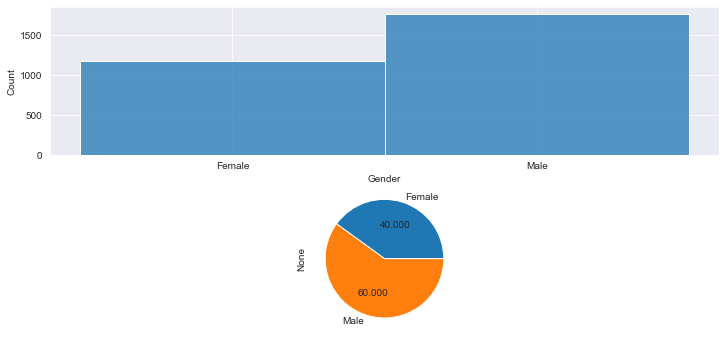

In [54]:
# Categorical Data 

plt.subplot(2,1,1)
sns.histplot(data = emp_attrition, x = 'Gender')

plt.subplot(2,1,2)
emp_attrition.groupby('Gender').size().plot(kind = 'pie', autopct = '%.3f')

print(emp_attrition.Gender.shape)

# Sufficient frequency of both categories. No action needed.

## JobInvolvement

(2940,)


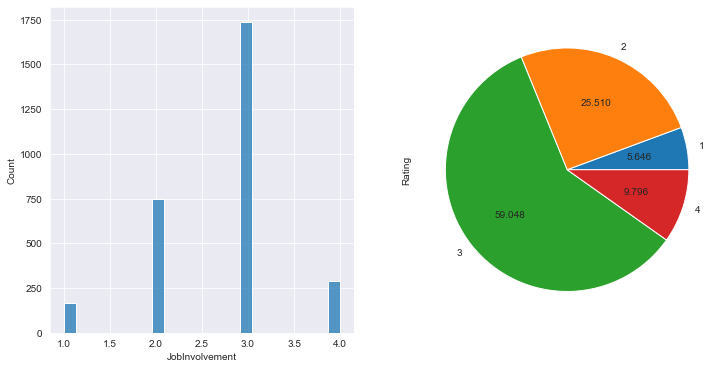

In [55]:
# ordinal data 

plt.subplot(1,2,1)
sns.histplot(data = emp_attrition, x = 'JobInvolvement')

plt.subplot(1,2,2)
emp_attrition.groupby('JobInvolvement').size().plot(kind = 'pie', label = 'Rating', autopct = '%.3f')

print(emp_attrition.JobInvolvement.shape)

In [96]:
for x in [1, 2, 3, 4]:

    print(f'%age of total attritions for {x} =',
           emp_attrition.loc[emp_attrition['JobInvolvement']== x]['Attrition'].sum()*100/474)

# INSIGHT - Substantial Attritions for each value. No action needed. 

%age of total attritions for 1 = 11.814345991561181
%age of total attritions for 2 = 29.957805907172997
%age of total attritions for 3 = 52.742616033755276
%age of total attritions for 4 = 5.485232067510548


## JobLevel

(2940,)


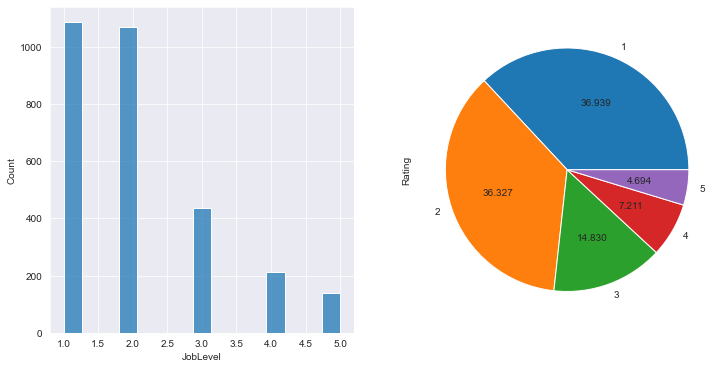

In [65]:
#ordinal data

plt.subplot(1,2,1)
sns.histplot(data = emp_attrition, x = 'JobLevel')

plt.subplot(1,2,2)
emp_attrition.groupby('JobLevel').size().plot(kind = 'pie', label = 'Rating', autopct = '%.3f')

print(emp_attrition.JobLevel.shape)

In [97]:
for x in [1,2,3,4, 5]:
    print(f'%age of total attritions for {x} = ',
           emp_attrition.loc[emp_attrition['JobLevel']== x]['Attrition'].sum()*100/474)
    
# INSIGHT - 4.2% attritions combined for JobLevel = 4 and 5
# We should filter out this data.

%age of total attritions for 1 =  60.33755274261603
%age of total attritions for 2 =  21.940928270042193
%age of total attritions for 3 =  13.50210970464135
%age of total attritions for 4 =  2.109704641350211
%age of total attritions for 5 =  2.109704641350211


## JobRole

(2940,)


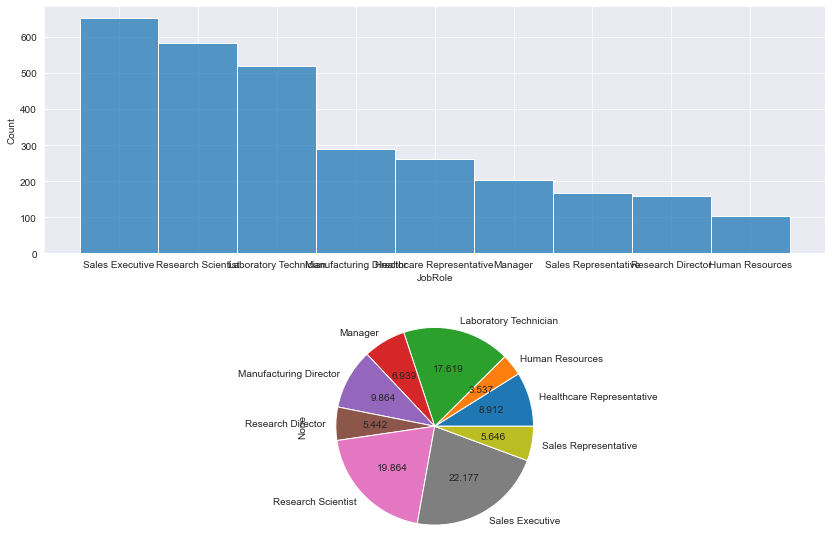

In [70]:
# categorical data

plt.subplot(2,1,1)
sns.histplot(data = emp_attrition, x = 'JobRole')

plt.subplot(2,1,2)
emp_attrition.groupby('JobRole').size().plot(kind = 'pie', autopct = '%.3f')

print(emp_attrition.JobRole.shape)

In [98]:
for x in ['Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 
          'Sales Executive', 'Sales Representative', 'Healthcare Representative', 'Human Resources',
          'Laboratory Technician']:
    print(f'%age of total attritions for {x} =',
           emp_attrition.loc[emp_attrition['JobRole']== x]['Attrition'].sum()*100/474)

# INSIGHT - 2.9% combined attritions rate for Manager and Research Scientist. We should filter out this data.

%age of total attritions for Manager = 2.109704641350211
%age of total attritions for Manufacturing Director = 4.219409282700422
%age of total attritions for Research Director = 0.8438818565400844
%age of total attritions for Research Scientist = 19.831223628691983
%age of total attritions for Sales Executive = 24.050632911392405
%age of total attritions for Sales Representative = 13.924050632911392
%age of total attritions for Healthcare Representative = 3.7974683544303796
%age of total attritions for Human Resources = 5.063291139240507
%age of total attritions for Laboratory Technician = 26.160337552742615


## JobSatisfaction

(2940,)


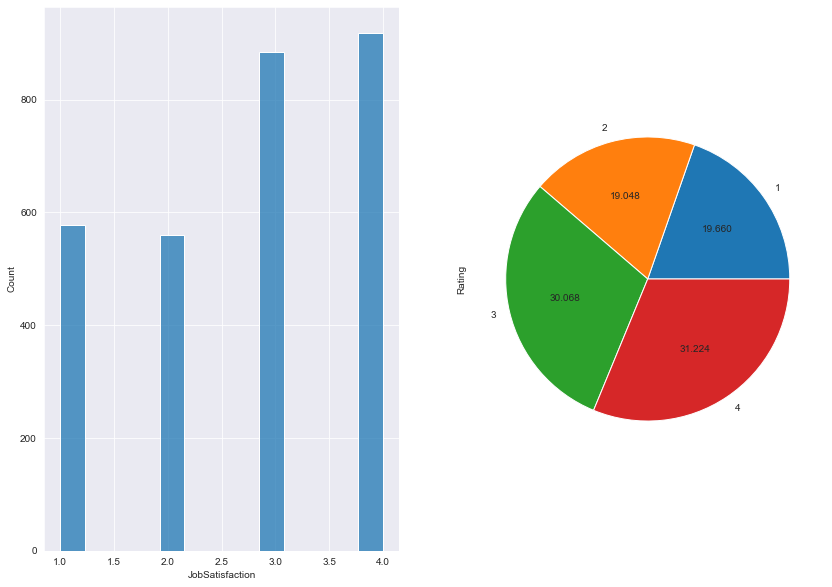

In [73]:
# ordinal data 

plt.subplot(1,2,1)
sns.histplot(data = emp_attrition, x = 'JobSatisfaction')

plt.subplot(1,2,2)
emp_attrition.groupby('JobSatisfaction').size().plot(kind = 'pie', label = 'Rating', autopct = '%.3f')

print(emp_attrition.JobSatisfaction.shape)

In [99]:
for x in [1, 2, 3, 4]:
    print(f'%age of total attritions for {x} = ',
           emp_attrition.loc[emp_attrition['JobSatisfaction']== x]['Attrition'].sum()*100/474)
    
# INSIGHT - Substantial Attritions for all levels of Job Satisfaction; No action needed. 

%age of total attritions for 1 =  27.848101265822784
%age of total attritions for 2 =  19.40928270042194
%age of total attritions for 3 =  30.80168776371308
%age of total attritions for 4 =  21.940928270042193


## MaritalStatus

(2940,)


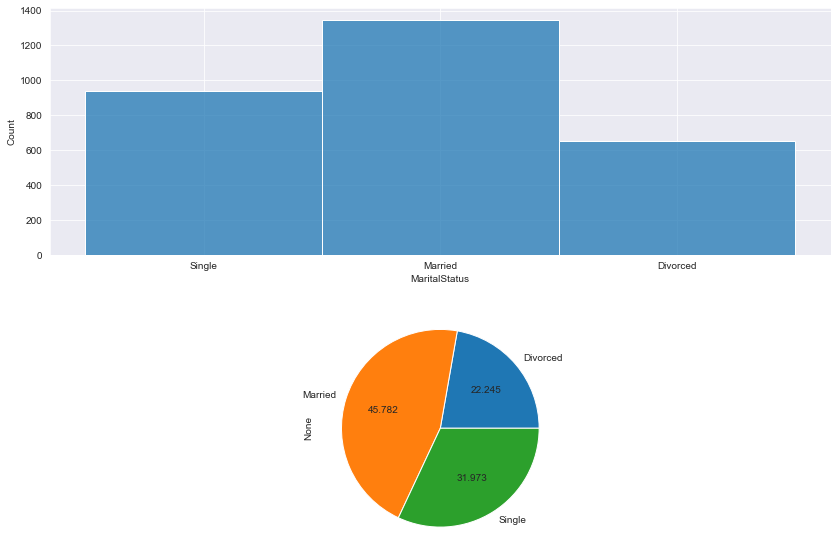

In [75]:
# categorical data

plt.subplot(2,1,1)
sns.histplot(data = emp_attrition, x = 'MaritalStatus')

plt.subplot(2,1,2)
emp_attrition.groupby('MaritalStatus').size().plot(kind = 'pie', autopct = '%.3f')

print(emp_attrition.MaritalStatus.shape)

In [102]:
for x in ['Married', 'Divorced', 'Single']:
    print(f'%age of attritions for {x} =',
           emp_attrition.loc[emp_attrition['MaritalStatus']== x]['Attrition'].sum()*100/474)
    
# INSIGHT - Substantial Attritions for each category; No Action needed. 

%age of attritions for Married = 35.44303797468354
%age of attritions for Divorced = 13.924050632911392
%age of attritions for Single = 50.63291139240506


## OverTime

(2940,)


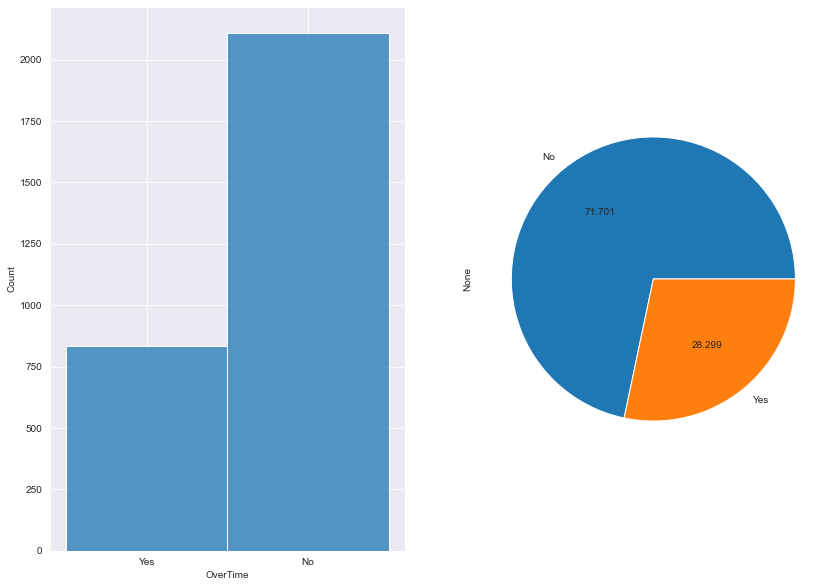

In [101]:
# cateogrical data

plt.subplot(1,2,1)
sns.histplot(data = emp_attrition, x = 'OverTime')

plt.subplot(1,2,2)
emp_attrition.groupby('OverTime').size().plot(kind = 'pie', autopct = '%.3f')

print(emp_attrition.OverTime.shape)

In [103]:
for x in ['Yes','No']:
    print(f'%age of attritions for {x} =',
           emp_attrition.loc[emp_attrition['OverTime']== x]['Attrition'].sum()*100/474)

# INSIGHT - Sufficent attritions for each category; No action needed. 

%age of attritions for Yes = 53.586497890295355
%age of attritions for No = 46.413502109704645


## RelationshipSatisfaction

(2940,)


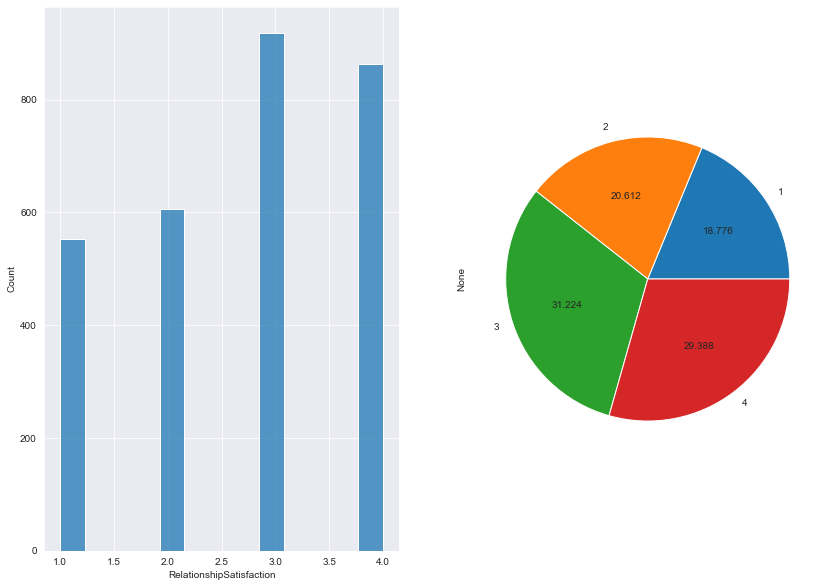

In [106]:
# ordinal data

plt.subplot(1,2,1)
sns.histplot(data = emp_attrition, x = 'RelationshipSatisfaction')

plt.subplot(1,2,2)
emp_attrition.groupby('RelationshipSatisfaction').size().plot(kind = 'pie', autopct = '%.3f')

print(emp_attrition.RelationshipSatisfaction.shape)

In [107]:
for x in [1, 2, 3, 4]:
    print(f'%age of attritions for {x} =',
           emp_attrition.loc[emp_attrition['RelationshipSatisfaction']== x]['Attrition'].sum()*100/474)
    
# INSIGHT - Substantial Attritions for each value; No action needed.

%age of attritions for 1 = 24.050632911392405
%age of attritions for 2 = 18.9873417721519
%age of attritions for 3 = 29.957805907172997
%age of attritions for 4 = 27.0042194092827


## StockOptionLevel

(2940,)


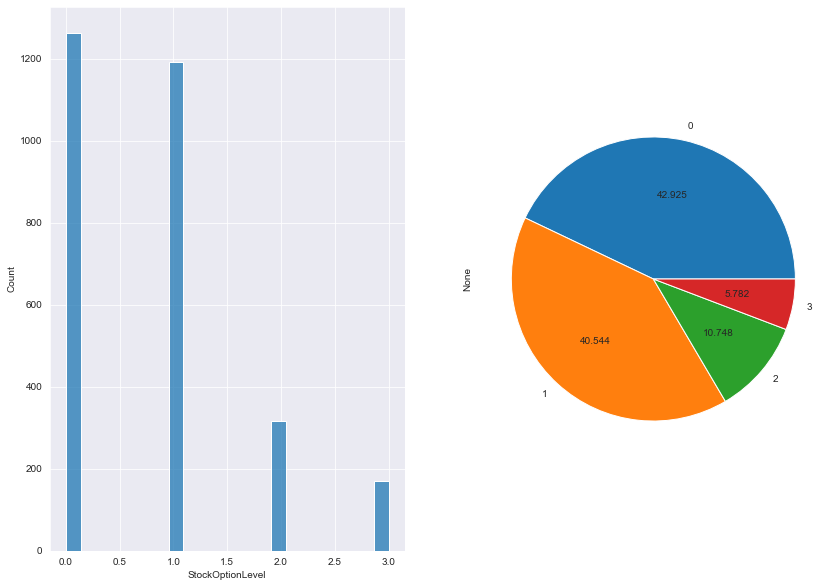

In [108]:
# ordinal data

plt.subplot(1,2,1)
sns.histplot(data = emp_attrition, x = 'StockOptionLevel')

plt.subplot(1,2,2)
emp_attrition.groupby('StockOptionLevel').size().plot(kind = 'pie', autopct = '%.3f')

print(emp_attrition.StockOptionLevel.shape)

In [109]:
for x in [0, 1, 2, 3]:
    print(f'%age of attritions for {x} =',
           emp_attrition.loc[emp_attrition['StockOptionLevel']== x]['Attrition'].sum()*100/474)

# INSIGHT - Substantial Attritions for each value; No action needed. 

%age of attritions for 0 = 64.9789029535865
%age of attritions for 1 = 23.628691983122362
%age of attritions for 2 = 5.063291139240507
%age of attritions for 3 = 6.329113924050633


## WorkLifeBalance

(2940,)


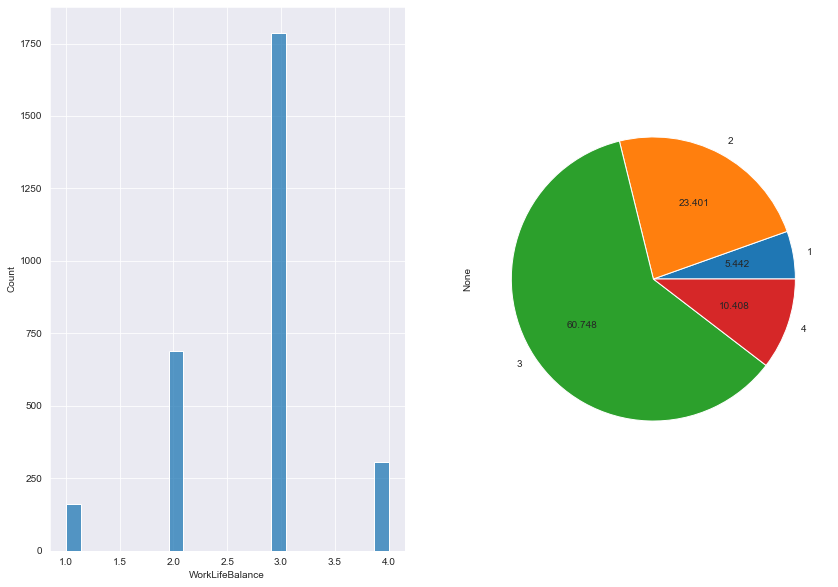

In [110]:
# ordinal data

plt.subplot(1,2,1)
sns.histplot(data = emp_attrition, x = 'WorkLifeBalance')

plt.subplot(1,2,2)
emp_attrition.groupby('WorkLifeBalance').size().plot(kind = 'pie', autopct = '%.3f')

print(emp_attrition.WorkLifeBalance.shape)

In [111]:
for x in [1, 2, 3, 4]:
    print(f'%age of attritions for {x} =',
           emp_attrition.loc[emp_attrition['WorkLifeBalance']== x]['Attrition'].sum()*100/474)
    
# INSIGHT - Substantial Attritions for each value; No action needed. 

%age of attritions for 1 = 10.548523206751055
%age of attritions for 2 = 24.47257383966245
%age of attritions for 3 = 53.586497890295355
%age of attritions for 4 = 11.39240506329114


In [10]:
# DATA FILTERING - Creating a filtered Dataset.
 
# Department != 'Human Resources'
# EducationField != 'Human Resources'
# JobLevel != 4,5
# JobRole != Research Director, Manager

emp_attrition_filter = emp_attrition.loc[(emp_attrition['Department'] != 'Human Resources') & 
                                         (emp_attrition['EducationField'] != 'Human Resources') & 
                                         ((emp_attrition['JobLevel']!=4) & (emp_attrition['JobLevel']!=5)) &
                                         ((emp_attrition['JobRole']!= 'Manager') & (emp_attrition['JobRole']!= 'Research Director'))
                                        ]

# emp_attrition_filter1 = emp_attrition.loc[(emp_attrition['Department'] != 'Human Resources') | 
#                                          (emp_attrition['EducationField'] != 'Human Resources') | 
#                                          ((emp_attrition['JobLevel']!=4) & (emp_attrition['JobLevel']!=5)) |
#                                          ((emp_attrition['JobRole']!= 'Manager') & (emp_attrition['JobRole']!= 'Research Director'))
#                                         ]

print(emp_attrition_filter.shape)
# print(emp_attrition_filter1.shape)

(2406, 26)


In [11]:
# emp_attrition_filter.groupby('Attrition').size().plot(kind = 'pie', label = 'attritions', autopct = '%.3f')

print(emp_attrition_filter['Attrition'].sum())

print((474-426)*100/474)
# Before filtering, total attritions = 474. Now Total Attritions = 426. Reduction = 48
# a 10% decrease in total attritions. 

426
10.126582278481013


<AxesSubplot:ylabel='attritions'>

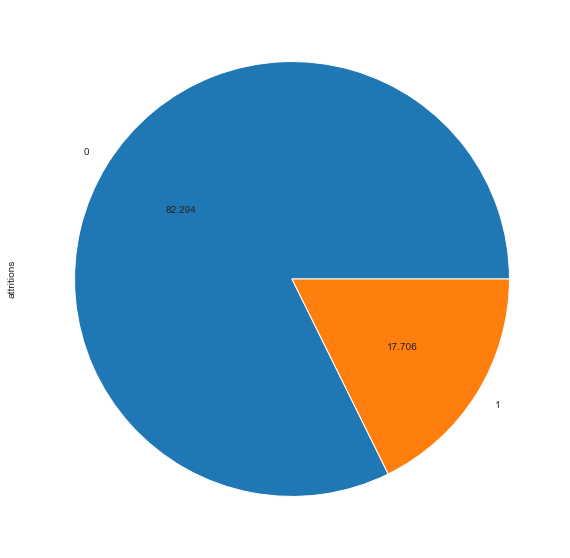

In [14]:
emp_attrition_filter.groupby('Attrition').size().plot(kind = 'pie', label = 'attritions', autopct = '%.3f')

# UNIVARIATE ANALYSIS ON FILTERED DATA

In [15]:
emp_attrition_filter.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

In [12]:
# CREATING A COPY OF THE FILTERED DATASET

emp_attrition_filter_unanalysed = emp_attrition_filter.copy(deep = True)

In [13]:
def numerical_data_column(column_name):
    plt.subplot(1,2,1)
    sns.histplot(data = emp_attrition_filter, x = str(column_name))

    plt.subplot(1,2,2)
    sns.boxplot(data = emp_attrition_filter, x = str(column_name))

    print('skewness = ', emp_attrition_filter[str(column_name)].skew())
    print('variance = ', emp_attrition_filter[str(column_name)].var())
    print(emp_attrition_filter[str(column_name)].describe())

## Age

skewness =  0.3486913526713864
variance =  65.37560602996989
count    2406.000000
mean       35.188695
std         8.085518
min        18.000000
25%        29.000000
50%        34.000000
75%        40.000000
max        52.000000
Name: Age, dtype: float64


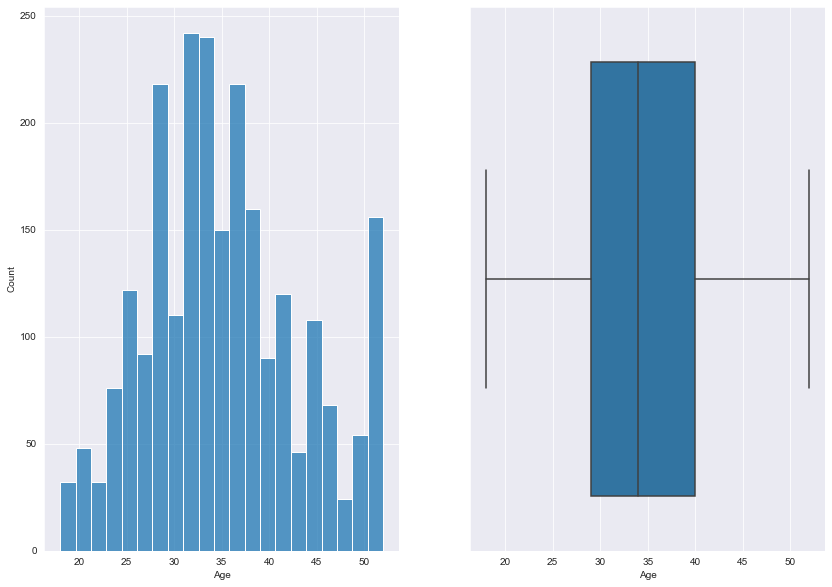

In [37]:
# Numerical data - cotinuous variable. 

numerical_data_column(column_name = 'Age')

# INSIGHT - There are a few upper outliers 
# Column needs to be standardized.

In [14]:
# flooring upper outliers to 95th percentile value. 

print(np.percentile(emp_attrition_filter.Age, 95))

emp_attrition_filter['Age'] = np.where(emp_attrition_filter['Age']>52.0, 52.0, emp_attrition_filter['Age'])

52.0


<AxesSubplot:xlabel='Age'>

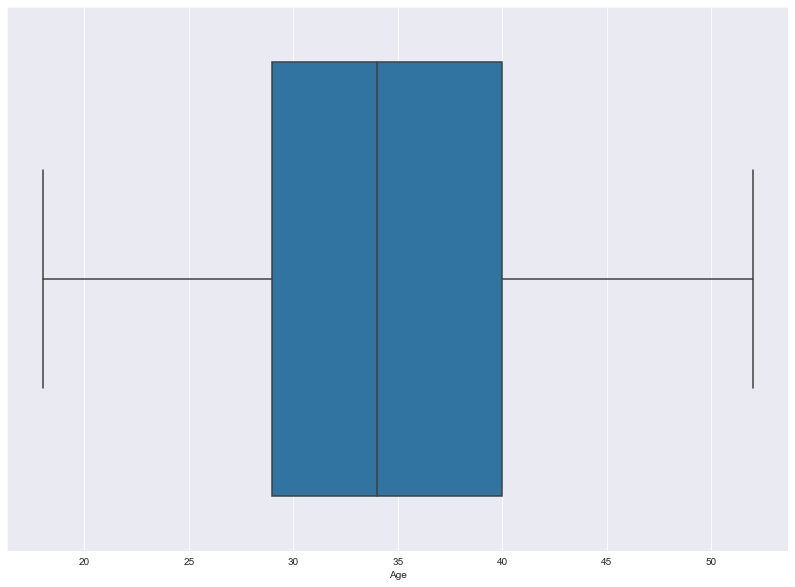

In [25]:
sns.boxplot(data = emp_attrition_filter, x = 'Age')

## DailyRate

skewness =  -0.014918713191686826
variance =  161310.93881235903
count    2406.000000
mean      807.958437
std       401.635331
min       103.000000
25%       472.500000
50%       805.000000
75%      1161.000000
max      1499.000000
Name: DailyRate, dtype: float64


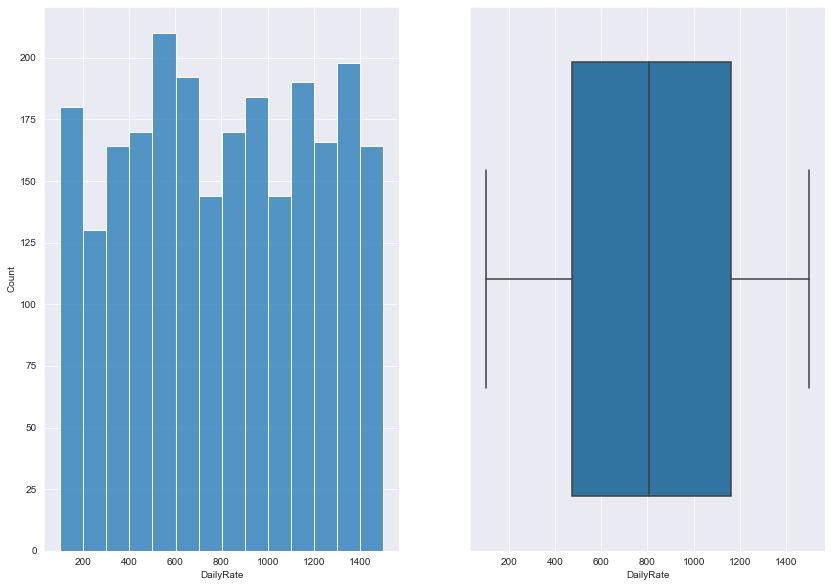

In [36]:
# Numerical data - cotinuous variable. 

numerical_data_column(column_name = 'DailyRate')

# INSIGHT - NO OUTLIERS. Column needs to be standardized.

## DistanceFromHome

skewness =  0.9311354071458352
variance =  65.23564823215736
count    2406.000000
mean        9.298421
std         8.076859
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64


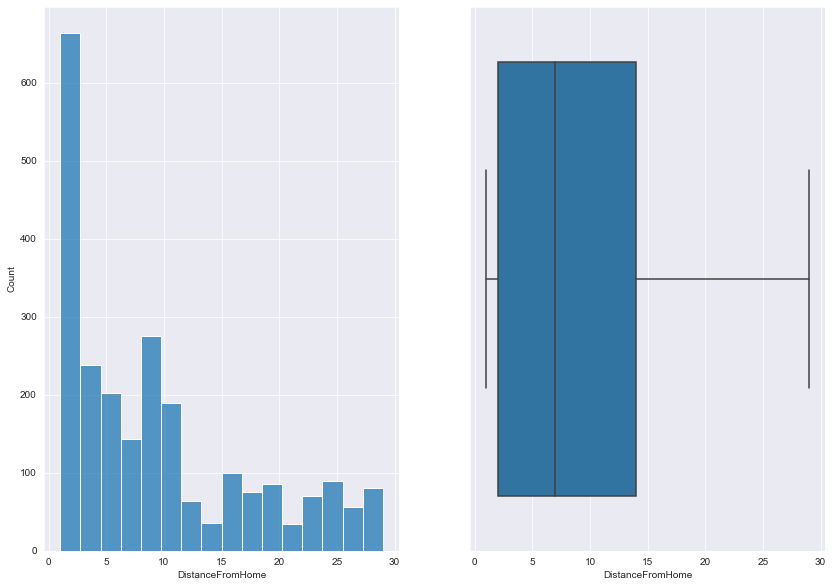

In [35]:
# Numerical Data - Continous variable (in km) 

numerical_data_column(column_name = 'DistanceFromHome')

# INSIGHT - No Outliers. Feature can be labelled as Near and Far. 
# Or, Feature can Be standardized if to be fed directly to the model. 

## HourlyRate

skewness =  -0.042194005181434104
variance =  413.09189811334517
count    2406.000000
mean       65.950125
std        20.324662
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64


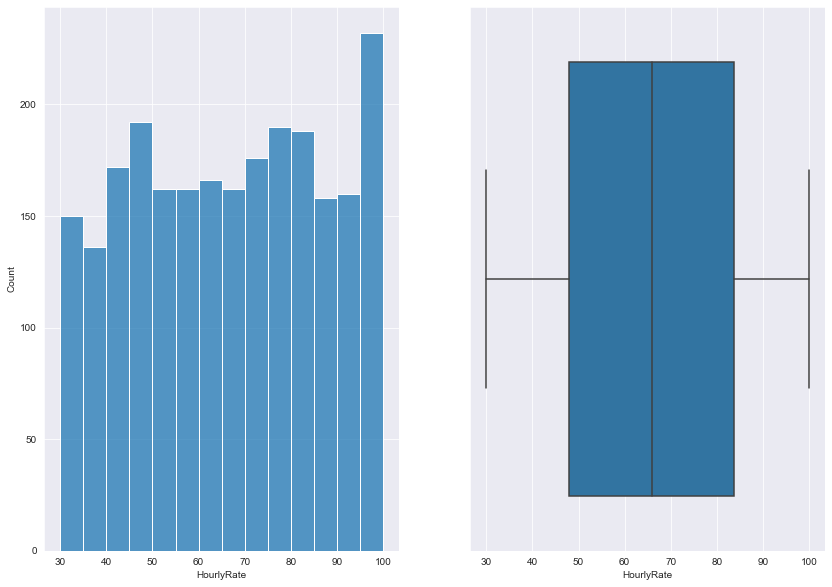

In [34]:
numerical_data_column(column_name = 'HourlyRate')

# INSIGHT - No Outliers. Column Needs to be standardized.

## MonthlyRate

skewness =  0.04370207650828243
variance =  50654118.51609367
count     2406.000000
mean     14213.034081
std       7117.170682
min       2094.000000
25%       7973.500000
50%      14039.000000
75%      20365.500000
max      26999.000000
Name: MonthlyRate, dtype: float64


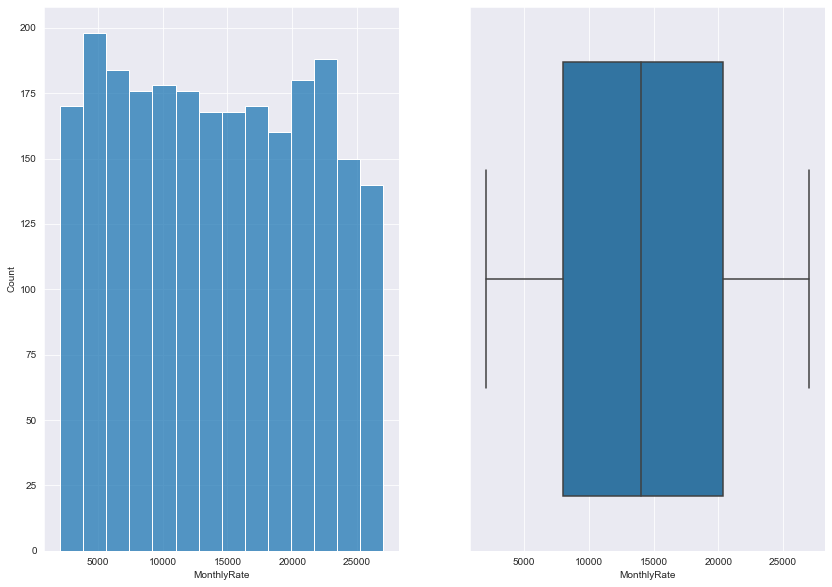

In [43]:
numerical_data_column(column_name = 'MonthlyRate')

# No outliers. Column needs to be standardized. 

## NumCompaniesWorked

skewness =  1.1123687797716268
variance =  5.989703495937867
count    2406.000000
mean        2.558603
std         2.447387
min         0.000000
25%         1.000000
50%         1.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64


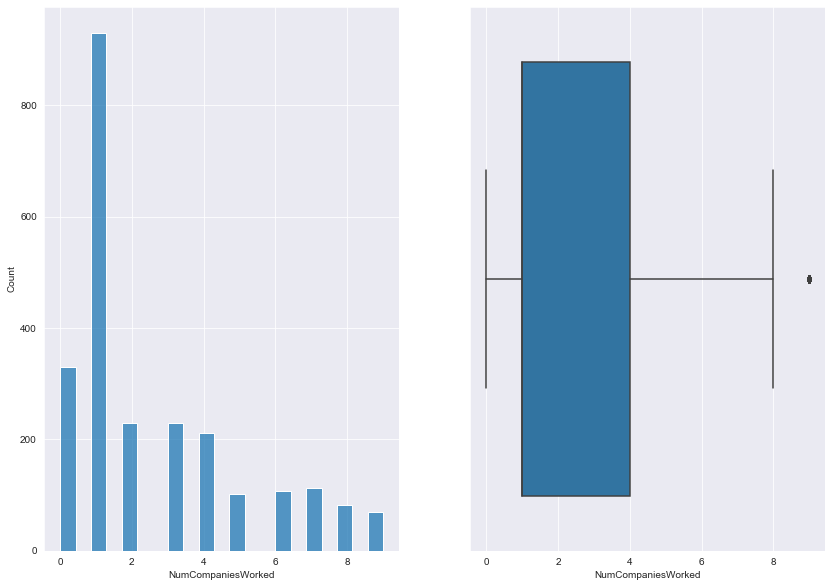

In [44]:
numerical_data_column('NumCompaniesWorked')

# Upper outliers exist.
# Standardization also needs to be done. 

In [15]:
# Handling Outliers. 

print(emp_attrition_filter.loc[emp_attrition_filter['NumCompaniesWorked']>8]['Attrition'].sum())
print(emp_attrition_filter.loc[emp_attrition_filter['NumCompaniesWorked']>8].shape)

print(np.percentile(emp_attrition_filter.NumCompaniesWorked, 95))
emp_attrition_filter['NumCompaniesWorked'] = np.where(emp_attrition_filter['NumCompaniesWorked']>8, 8, 
                                                      emp_attrition_filter['NumCompaniesWorked'])

20
(70, 26)
8.0


## PercentSalaryHike

skewness =  0.7997235686388631
variance =  13.23585561391048
count    2406.000000
mean       15.257689
std         3.638112
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64


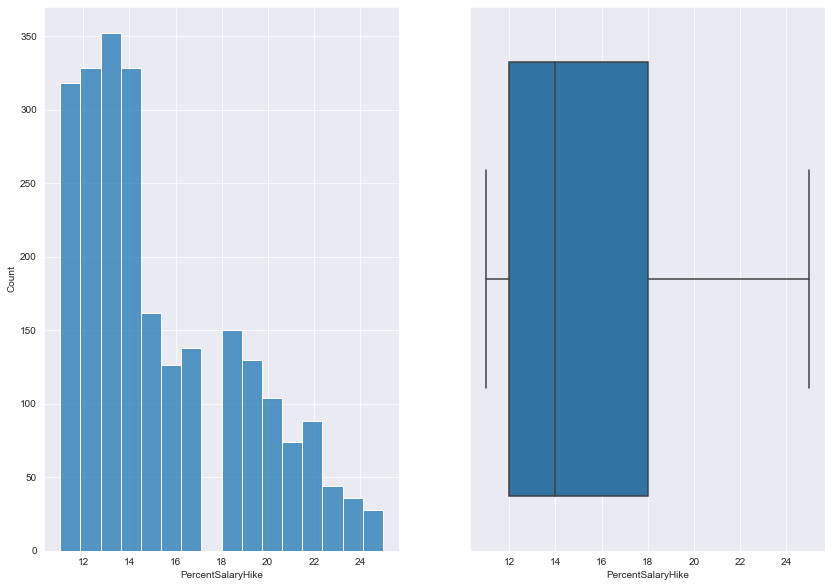

In [52]:
numerical_data_column(column_name = 'PercentSalaryHike')

# NO OUTLIERS. 
# DATA NEEDS TO BE STANDARDIZED.

## TrainingTimesLastYear

skewness =  0.5441661437945647
variance =  1.7023968146162662
count    2406.000000
mean        2.817955
std         1.304759
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64


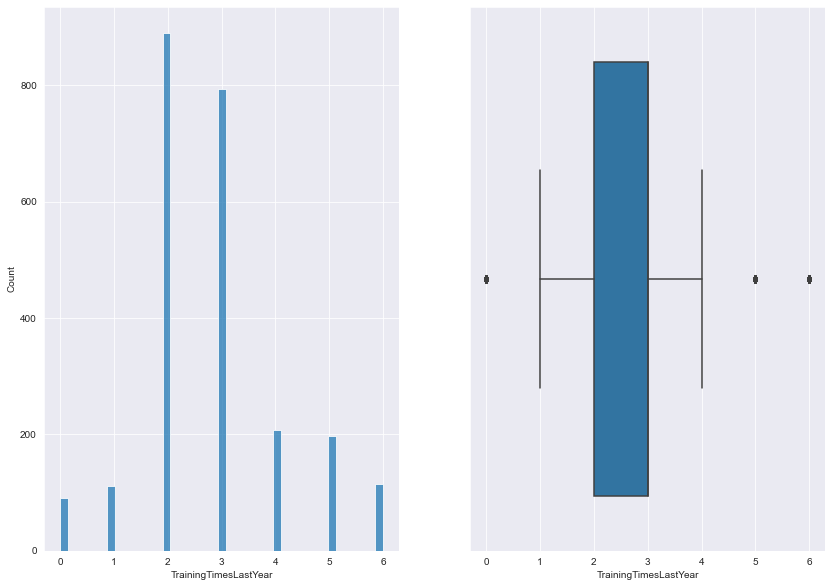

In [53]:
numerical_data_column(column_name = 'TrainingTimesLastYear')

In [16]:
emp_attrition_filter['TrainingTimesLastYear'] = np.where(emp_attrition_filter['TrainingTimesLastYear']>5, 5, 
                                                      emp_attrition_filter['TrainingTimesLastYear'])

emp_attrition_filter['TrainingTimesLastYear'] = np.where(emp_attrition_filter['TrainingTimesLastYear']<1, 1, 
                                                      emp_attrition_filter['TrainingTimesLastYear'])

## YearsAtCompany

skewness =  0.7997235686388631
variance =  13.23585561391048
count    2406.000000
mean       15.257689
std         3.638112
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64


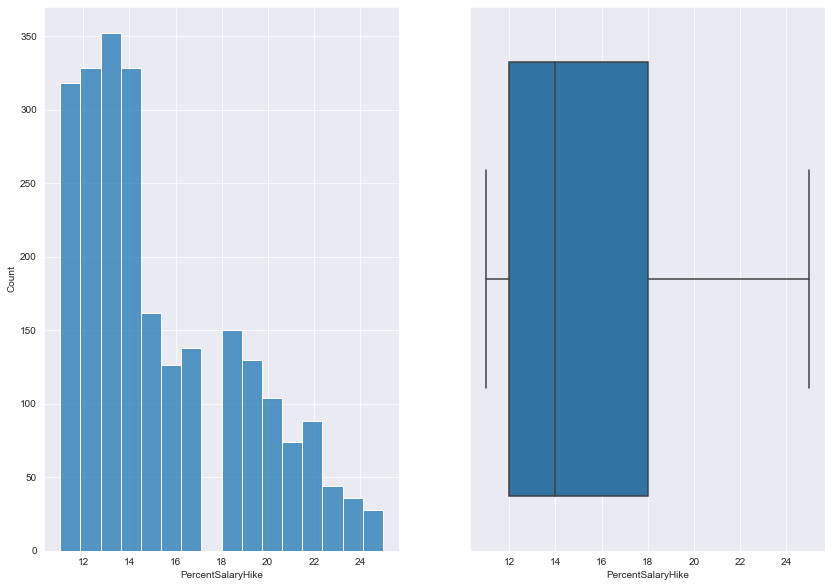

In [67]:
numerical_data_column(column_name = 'PercentSalaryHike')

# NO OUTLIERS
# NEEDS TO BE STANDARDIZED

In [70]:
emp_attrition_filter['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 18, 16, 19, 24, 25],
      dtype=int64)

## YearsSinceLastPromotion

skewness =  2.0741707653171773
variance =  7.627386143096748
count    2406.000000
mean        1.844555
std         2.761772
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64


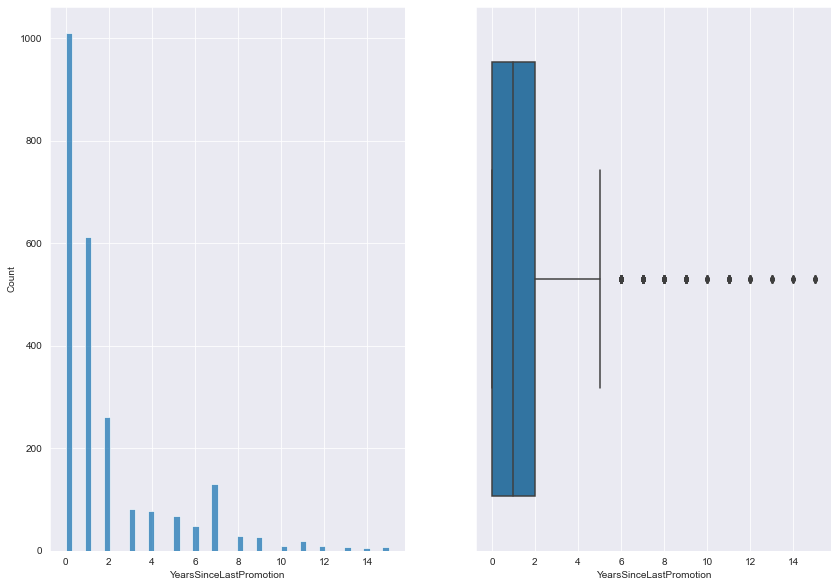

In [72]:
numerical_data_column(column_name = 'YearsSinceLastPromotion')

# INSIGHT - UPPER OUTLIERS.
# DATA NEEDS TO BE STANDARDIZED

In [85]:
print(emp_attrition_filter.loc[(emp_attrition_filter['YearsSinceLastPromotion']>5)].shape)
print(emp_attrition_filter.loc[(emp_attrition_filter['YearsSinceLastPromotion']>5)]['Attrition'].sum())

print(emp_attrition_filter.loc[(emp_attrition_filter['YearsSinceLastPromotion']>6)]['Attrition'].sum())

print(emp_attrition_filter.loc[(emp_attrition_filter['YearsSinceLastPromotion']>7)]['Attrition'].sum())

print(emp_attrition_filter.loc[(emp_attrition_filter['YearsSinceLastPromotion']>8)]['Attrition'].sum())



# the 12% outlier data accounts for 12% of total attritions. We cannot remove these outliers
# as this information is not erroneous. We can floor these outliers to YearsSinceLastPromotion == 7 (90th percentile.)

(294, 26)
54
44
14
14


In [17]:
np.percentile(emp_attrition_filter.YearsSinceLastPromotion, 90)

emp_attrition_filter['YearsSinceLastPromotion'] = np.where(emp_attrition_filter['YearsSinceLastPromotion']>7, 7, 
                                                      emp_attrition_filter['YearsSinceLastPromotion'])

skewness =  1.4179704963374506
variance =  5.127173749617623
count    2406.000000
mean        1.680798
std         2.264326
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: YearsSinceLastPromotion, dtype: float64


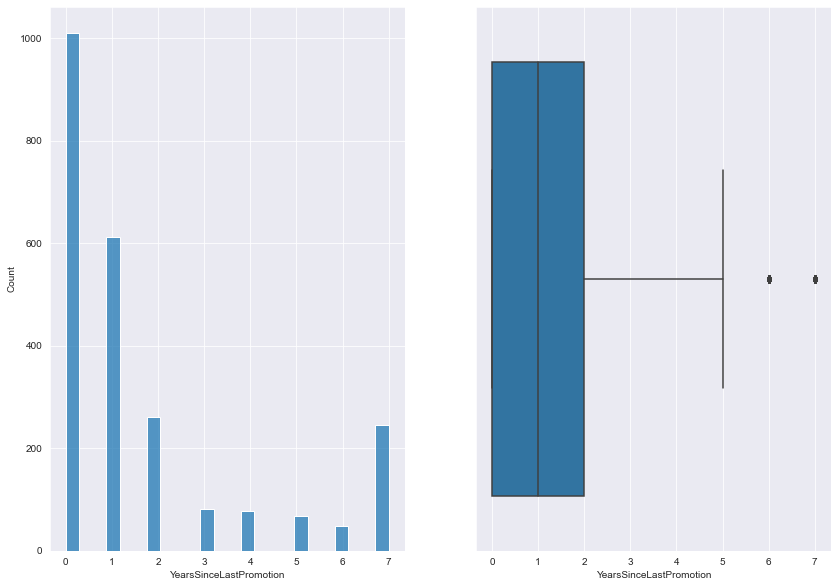

In [89]:
numerical_data_column(column_name = 'YearsSinceLastPromotion')

In [18]:
emp_attrition_filter.shape

(2406, 26)

In [19]:
emp_attrition_analysed = emp_attrition_filter.copy(deep = True)

# DATA TRANSFORMATION

## Label Encoding

In [ ]:
# 1. Gender
# 2. OverTime

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

## Gender

In [21]:
emp_attrition_analysed['Gender'] = le.fit_transform(emp_attrition_analysed.Gender.values)

# Female - 0
# Male - 1

In [94]:
emp_attrition_analysed.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41.0,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,19479,8,Yes,11,1,0,0,1,6,0
1,49.0,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,24907,1,No,23,4,1,3,3,10,1
2,37.0,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,2396,6,Yes,15,2,0,3,3,0,0
3,33.0,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,23159,1,Yes,11,3,0,3,3,8,3
4,27.0,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,16632,9,No,12,4,1,3,3,2,2


## OverTime

In [22]:
emp_attrition_analysed['OverTime'] = le.fit_transform(emp_attrition_analysed.OverTime.values)

# Yes - 1
# N0 - 0

In [97]:
emp_attrition_analysed.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41.0,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,19479,8,1,11,1,0,0,1,6,0
1,49.0,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,24907,1,0,23,4,1,3,3,10,1
2,37.0,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,2396,6,1,15,2,0,3,3,0,0
3,33.0,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,23159,1,1,11,3,0,3,3,8,3
4,27.0,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,16632,9,0,12,4,1,3,3,2,2


# One Hot Encoding

In [23]:
emp_attrition_analysed.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

In [24]:
emp_attrition_analysed.shape

(2406, 26)

In [ ]:
# Columns to One Hot Encode:

# 1. BusinessTravel
# 2. Department
# 3. EducationField
# 4. MaritalStatus
# 5. JobRole

In [25]:
# function to encode feature and then remove the original feature from dataframe after it has been encoded. 

def encode_and_bind(emp_attrition_analysed, feature_to_encode):
    dummies = pd.get_dummies(emp_attrition_analysed[[feature_to_encode]])
    emp_attrition_analysed = pd.concat([emp_attrition_analysed, dummies], axis=1)
    emp_attrition_analysed = emp_attrition_analysed.drop([feature_to_encode], axis=1)
    return(emp_attrition_analysed) 

In [26]:
features_to_encode = ['BusinessTravel', 'Department', 'EducationField', 
                      'MaritalStatus', 'JobRole']

for feature in features_to_encode:
    emp_attrition_analysed = encode_and_bind(emp_attrition_analysed, feature)

In [27]:
emp_attrition_analysed.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'JobRole_Healthcare Representative',
       'JobRole_Laboratory Technician', 'JobRole_Manufacturing Director',
       'JobRole_Research Scientist', 'JobRole_Sales

In [28]:
emp_attrition_encoded = emp_attrition_analysed.copy(deep = True)

In [30]:
emp_attrition_encoded.shape

(2406, 40)

In [48]:
emp_attrition_encoded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41.0,1,1102,1,2,2,0,94,3,2,...,0,0,0,1,0,0,0,0,1,0
1,49.0,0,279,8,1,3,1,61,2,2,...,0,0,1,0,0,0,0,1,0,0
2,37.0,1,1373,2,2,4,1,92,2,1,...,0,0,0,1,0,1,0,0,0,0
3,33.0,0,1392,3,4,4,0,56,3,1,...,0,0,1,0,0,0,0,1,0,0
4,27.0,0,591,2,1,1,1,40,3,1,...,0,0,1,0,0,1,0,0,0,0


In [31]:
# Again Checking for Correlated Columns

corr = emp_attrition_encoded.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
Age,1.00,-0.13,0.01,0.02,0.22,0.00,-0.03,0.04,0.02,0.34,0.00,0.01,0.30,0.01,0.01,0.04,0.06,-0.00,-0.01,0.22,0.13,-0.01,0.00,0.01,0.02,-0.02,0.03,0.05,-0.04,-0.03,-0.02,0.06,0.07,-0.12,0.15,-0.08,0.09,-0.08,0.08,-0.16
Attrition,-0.13,1.00,-0.07,0.07,-0.03,-0.10,0.03,-0.01,-0.14,-0.14,-0.11,0.02,0.06,0.26,0.00,-0.07,-0.15,-0.04,-0.07,-0.15,-0.03,-0.09,0.12,-0.04,-0.07,0.07,-0.03,0.05,-0.03,-0.01,0.07,-0.10,-0.10,0.19,-0.10,0.09,-0.10,-0.02,-0.01,0.16
DailyRate,0.01,-0.07,1.00,-0.00,-0.02,0.04,0.01,0.02,0.05,0.02,0.03,-0.02,0.03,0.02,0.02,-0.00,0.06,-0.00,-0.03,-0.01,-0.03,0.03,-0.01,-0.01,0.00,-0.00,-0.00,-0.06,0.03,-0.00,0.02,0.04,0.04,-0.08,0.05,-0.01,-0.01,-0.01,-0.00,0.00
DistanceFromHome,0.02,0.07,-0.00,1.00,0.00,-0.02,0.03,0.03,0.00,0.06,0.00,0.03,0.00,0.00,0.03,0.02,0.06,-0.04,-0.04,0.03,0.02,0.04,-0.02,-0.01,-0.00,0.00,-0.04,0.03,0.03,-0.00,-0.00,0.02,0.02,-0.04,0.03,0.01,-0.01,-0.02,0.01,-0.02
Education,0.22,-0.03,-0.02,0.00,1.00,-0.00,-0.01,0.00,0.02,0.11,0.01,-0.05,0.13,-0.02,-0.02,0.01,0.02,-0.02,0.00,0.08,0.09,0.02,-0.03,0.01,-0.01,0.01,0.01,0.09,-0.08,0.04,-0.02,0.01,0.00,-0.01,0.04,-0.06,0.00,0.01,0.07,-0.10
EnvironmentSatisfaction,0.00,-0.10,0.04,-0.02,-0.00,1.00,-0.00,-0.03,-0.01,0.01,-0.01,0.04,0.01,0.07,-0.03,0.02,0.01,-0.02,0.02,0.03,0.03,0.02,0.00,-0.02,0.03,-0.03,-0.04,0.02,-0.03,0.07,0.03,0.03,-0.03,0.00,0.01,-0.01,0.06,-0.01,-0.03,-0.00
Gender,-0.03,0.03,0.01,0.03,-0.01,-0.00,1.00,-0.01,0.03,-0.03,0.03,-0.03,-0.02,-0.04,0.02,0.03,0.03,-0.05,-0.02,-0.08,-0.05,0.05,-0.03,-0.01,0.03,-0.03,0.02,-0.03,-0.03,0.01,0.02,0.04,-0.00,-0.03,0.00,0.07,-0.06,0.00,-0.01,-0.04
HourlyRate,0.04,-0.01,0.02,0.03,0.00,-0.03,-0.01,1.00,0.06,-0.05,-0.07,0.01,0.03,0.01,-0.03,0.01,0.06,0.01,0.01,-0.03,-0.05,-0.01,-0.04,0.04,0.03,-0.03,0.03,-0.00,-0.03,-0.04,0.02,0.00,0.04,-0.04,0.01,0.02,-0.02,0.02,-0.02,-0.02
JobInvolvement,0.02,-0.14,0.05,0.00,0.02,-0.01,0.03,0.06,1.00,-0.04,-0.00,-0.02,0.00,-0.02,-0.02,0.03,0.03,-0.01,-0.00,0.01,-0.01,-0.05,0.01,0.03,0.03,-0.03,0.00,-0.01,0.01,-0.02,0.01,0.02,0.05,-0.06,0.01,-0.02,-0.01,0.06,-0.02,-0.03
JobLevel,0.34,-0.14,0.02,0.06,0.11,0.01,-0.03,-0.05,-0.04,1.00,0.00,0.04,0.10,-0.02,-0.02,-0.01,0.03,-0.01,0.05,0.43,0.25,0.01,-0.00,-0.01,-0.29,0.29,-0.02,0.19,-0.08,-0.01,-0.03,0.06,0.02,-0.07,0.31,-0.36,0.31,-0.42,0.45,-0.25


In [32]:
# DROPPING CORRELATED COLUMNS 

emp_attrition_encoded.drop(columns = ['Department_Sales', 'JobRole_Sales Representative'], inplace = True)

In [33]:
corr = emp_attrition_encoded.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,JobRole_Sales Executive
Age,1.00,-0.13,0.01,0.02,0.22,0.00,-0.03,0.04,0.02,0.34,0.00,0.01,0.30,0.01,0.01,0.04,0.06,-0.00,-0.01,0.22,0.13,-0.01,0.00,0.01,0.02,0.03,0.05,-0.04,-0.03,-0.02,0.06,0.07,-0.12,0.15,-0.08,0.09,-0.08,0.08
Attrition,-0.13,1.00,-0.07,0.07,-0.03,-0.10,0.03,-0.01,-0.14,-0.14,-0.11,0.02,0.06,0.26,0.00,-0.07,-0.15,-0.04,-0.07,-0.15,-0.03,-0.09,0.12,-0.04,-0.07,-0.03,0.05,-0.03,-0.01,0.07,-0.10,-0.10,0.19,-0.10,0.09,-0.10,-0.02,-0.01
DailyRate,0.01,-0.07,1.00,-0.00,-0.02,0.04,0.01,0.02,0.05,0.02,0.03,-0.02,0.03,0.02,0.02,-0.00,0.06,-0.00,-0.03,-0.01,-0.03,0.03,-0.01,-0.01,0.00,-0.00,-0.06,0.03,-0.00,0.02,0.04,0.04,-0.08,0.05,-0.01,-0.01,-0.01,-0.00
DistanceFromHome,0.02,0.07,-0.00,1.00,0.00,-0.02,0.03,0.03,0.00,0.06,0.00,0.03,0.00,0.00,0.03,0.02,0.06,-0.04,-0.04,0.03,0.02,0.04,-0.02,-0.01,-0.00,-0.04,0.03,0.03,-0.00,-0.00,0.02,0.02,-0.04,0.03,0.01,-0.01,-0.02,0.01
Education,0.22,-0.03,-0.02,0.00,1.00,-0.00,-0.01,0.00,0.02,0.11,0.01,-0.05,0.13,-0.02,-0.02,0.01,0.02,-0.02,0.00,0.08,0.09,0.02,-0.03,0.01,-0.01,0.01,0.09,-0.08,0.04,-0.02,0.01,0.00,-0.01,0.04,-0.06,0.00,0.01,0.07
EnvironmentSatisfaction,0.00,-0.10,0.04,-0.02,-0.00,1.00,-0.00,-0.03,-0.01,0.01,-0.01,0.04,0.01,0.07,-0.03,0.02,0.01,-0.02,0.02,0.03,0.03,0.02,0.00,-0.02,0.03,-0.04,0.02,-0.03,0.07,0.03,0.03,-0.03,0.00,0.01,-0.01,0.06,-0.01,-0.03
Gender,-0.03,0.03,0.01,0.03,-0.01,-0.00,1.00,-0.01,0.03,-0.03,0.03,-0.03,-0.02,-0.04,0.02,0.03,0.03,-0.05,-0.02,-0.08,-0.05,0.05,-0.03,-0.01,0.03,0.02,-0.03,-0.03,0.01,0.02,0.04,-0.00,-0.03,0.00,0.07,-0.06,0.00,-0.01
HourlyRate,0.04,-0.01,0.02,0.03,0.00,-0.03,-0.01,1.00,0.06,-0.05,-0.07,0.01,0.03,0.01,-0.03,0.01,0.06,0.01,0.01,-0.03,-0.05,-0.01,-0.04,0.04,0.03,0.03,-0.00,-0.03,-0.04,0.02,0.00,0.04,-0.04,0.01,0.02,-0.02,0.02,-0.02
JobInvolvement,0.02,-0.14,0.05,0.00,0.02,-0.01,0.03,0.06,1.00,-0.04,-0.00,-0.02,0.00,-0.02,-0.02,0.03,0.03,-0.01,-0.00,0.01,-0.01,-0.05,0.01,0.03,0.03,0.00,-0.01,0.01,-0.02,0.01,0.02,0.05,-0.06,0.01,-0.02,-0.01,0.06,-0.02
JobLevel,0.34,-0.14,0.02,0.06,0.11,0.01,-0.03,-0.05,-0.04,1.00,0.00,0.04,0.10,-0.02,-0.02,-0.01,0.03,-0.01,0.05,0.43,0.25,0.01,-0.00,-0.01,-0.29,-0.02,0.19,-0.08,-0.01,-0.03,0.06,0.02,-0.07,0.31,-0.36,0.31,-0.42,0.45


In [34]:
emp_attrition_encoded.drop(columns = ['JobRole_Sales Executive'], inplace = True)

In [35]:
emp_attrition_encoded.shape

(2406, 37)

# Standardization

In [47]:
emp_attrition_training = emp_attrition_final.drop(columns = ['Attrition'])

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = StandardScaler().fit_transform(emp_attrition_training.values)
emp_attrition_standard = pd.DataFrame(scaled_features, index = emp_attrition_training.index, 
                                    columns = emp_attrition_training.columns)

In [49]:
emp_attrition_standard.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist
0,0.718879,0.732263,-1.027645,-0.871456,-0.675236,-1.240151,1.380377,0.386573,0.402209,1.139195,...,-0.672977,-0.248562,-0.323548,-0.528949,-0.890419,1.395897,-0.335944,-0.523798,-0.355534,-0.566151
1,1.708508,-1.317285,-0.160792,-1.850318,0.242627,0.806353,-0.243603,-1.009965,0.402209,-0.667597,...,-0.672977,-0.248562,-0.323548,-0.528949,1.123066,-0.716385,-0.335944,-0.523798,-0.355534,1.766313
2,0.224065,1.407145,-0.903809,-0.871456,1.160490,0.806353,1.281954,-1.009965,-1.029323,0.235799,...,-0.672977,4.023147,-0.323548,-0.528949,-0.890419,1.395897,-0.335944,1.909133,-0.355534,-0.566151
3,-0.270749,1.454461,-0.779973,1.086269,1.160490,-1.240151,-0.489661,0.386573,-1.029323,0.235799,...,-0.672977,-0.248562,-0.323548,-0.528949,1.123066,-0.716385,-0.335944,-0.523798,-0.355534,1.766313
4,-1.012971,-0.540300,-0.903809,-1.850318,-1.593099,0.806353,-1.277046,0.386573,-1.029323,-0.667597,...,1.485934,-0.248562,-0.323548,-0.528949,1.123066,-0.716385,-0.335944,1.909133,-0.355534,-0.566151


In [50]:
emp_attrition_scaled.shape

(2406, 37)

In [51]:
emp_attrition_encoded['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
2935    0
2936    0
2937    0
2938    0
2939    0
Name: Attrition, Length: 2406, dtype: int32

In [52]:
emp_attrition_model = emp_attrition_standard.assign(Attrition = emp_attrition_encoded['Attrition'])

In [53]:
emp_attrition_model.shape

(2406, 37)

In [54]:
emp_attrition_model.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Scientist,Attrition
0,0.718879,0.732263,-1.027645,-0.871456,-0.675236,-1.240151,1.380377,0.386573,0.402209,1.139195,...,-0.248562,-0.323548,-0.528949,-0.890419,1.395897,-0.335944,-0.523798,-0.355534,-0.566151,1
1,1.708508,-1.317285,-0.160792,-1.850318,0.242627,0.806353,-0.243603,-1.009965,0.402209,-0.667597,...,-0.248562,-0.323548,-0.528949,1.123066,-0.716385,-0.335944,-0.523798,-0.355534,1.766313,0
2,0.224065,1.407145,-0.903809,-0.871456,1.160490,0.806353,1.281954,-1.009965,-1.029323,0.235799,...,4.023147,-0.323548,-0.528949,-0.890419,1.395897,-0.335944,1.909133,-0.355534,-0.566151,1
3,-0.270749,1.454461,-0.779973,1.086269,1.160490,-1.240151,-0.489661,0.386573,-1.029323,0.235799,...,-0.248562,-0.323548,-0.528949,1.123066,-0.716385,-0.335944,-0.523798,-0.355534,1.766313,0
4,-1.012971,-0.540300,-0.903809,-1.850318,-1.593099,0.806353,-1.277046,0.386573,-1.029323,-0.667597,...,-0.248562,-0.323548,-0.528949,1.123066,-0.716385,-0.335944,1.909133,-0.355534,-0.566151,0


# CART DECISION TREE

## Splitting the dataset into training and testing dataset

In [55]:
x = emp_attrition_model.drop(['Attrition'], axis =1).values # storing independent variables in x 
y = emp_attrition_model['Attrition'].values # storing target variable in y

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.20) # testing data = 0.20 or 20%

## Modelling

In [42]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [43]:
import time
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [44]:
model_dt = DecisionTreeClassifier(random_state = 1)

In [57]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [8, 9, 10, 11, 12, 13, 14],
              'min_samples_split':[50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
              'min_samples_leaf':list(range(15, 40, 2)),              
              'criterion': ['gini']}

model_dt_cv = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 2)

model_dt_cv.fit(x_train, y_train)

print('Best Parameters using grid search: \n', model_dt_cv.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 37, 'min_samples_split': 95}
Time taken in grid search:  81.90


## Performance Metrics

In [58]:
model_dt_cv_score_train = model_dt_cv.score(x_train, y_train)
print("Training score: ",model_dt_cv_score_train)
model_dt_cv_score_test = model_dt_cv.score(x_test, y_test)
print("Testing score: ",model_dt_cv_score_test)

Training score:  0.8513513513513513
Testing score:  0.8340248962655602


In [59]:
y_pred_dt = model_dt_cv.predict_proba(x_test)[:, 1] 

In [60]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt) # making the roc curve
roc_auc_dt = auc(fpr_dt, tpr_dt) # calculating area under the roc curve
roc_auc_dt

0.8321294338736198

In [61]:
predictions = model_dt_cv.predict(x_test)

In [62]:
y_actual_result = 0

for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

In [63]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.5862068965517241


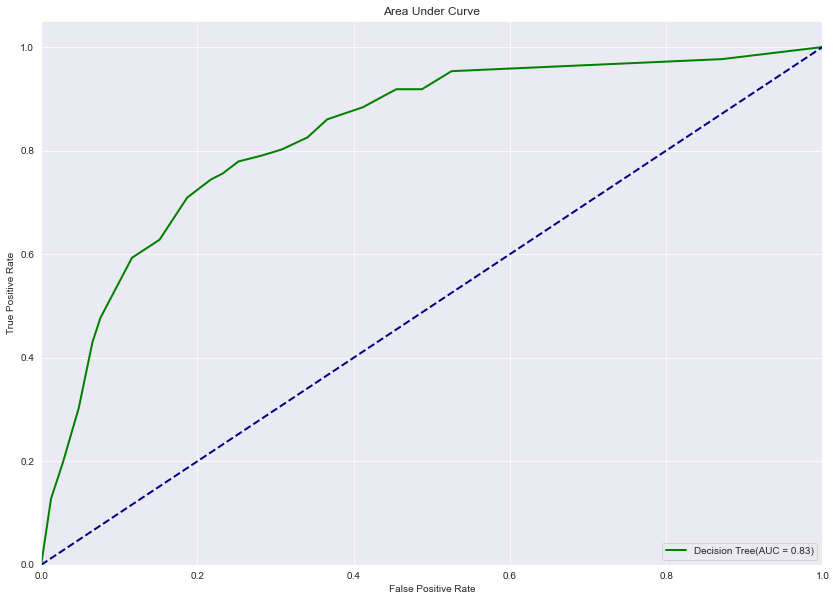

In [64]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [65]:
print (confusion_matrix(y_test, predictions))

[[385  11]
 [ 69  17]]


In [66]:
accuracy_score(y_test, predictions)

0.8340248962655602

In [ ]:
# ACCURACY = 83.4%

# LOGISTIC REGRESSION

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [68]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train,y_train)

LogisticRegression()

In [69]:
y_pred_logr = logreg.predict(x_test)

In [72]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logr)
cnf_matrix

array([[383,  13],
       [ 45,  41]], dtype=int64)

In [73]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_logr))
print("Precision:", metrics.precision_score(y_test, y_pred_logr))
print("Recall:", metrics.recall_score(y_test, y_pred_logr))

Accuracy: 0.8796680497925311
Precision: 0.7592592592592593
Recall: 0.47674418604651164


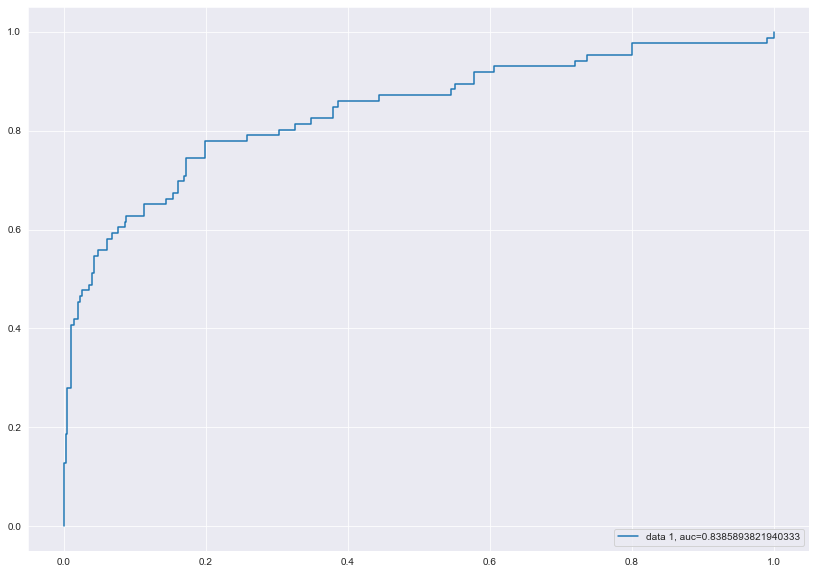

In [75]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Accuracy = 87.9% 

# K-NEAREST NEIGHBORS

In [77]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier 

 ## detection of optimal K-value

In [78]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

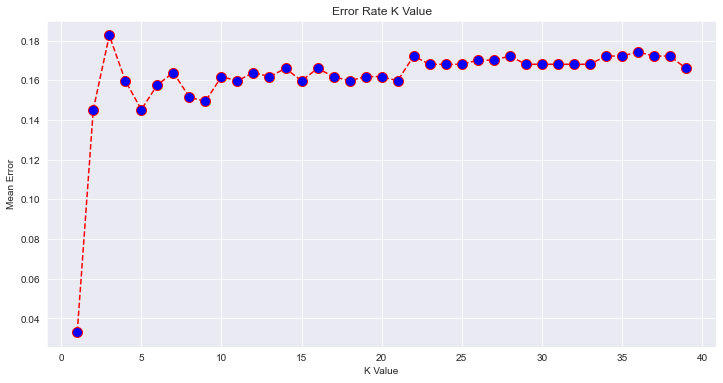

In [79]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

In [80]:
classifier = KNeighborsClassifier(n_neighbors=11)  
classifier.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=11)

In [81]:
y_pred_knn = classifier.predict(x_test)

In [82]:
from sklearn.metrics import classification_report  

print(confusion_matrix(y_test, y_pred_knn))  
print(classification_report(y_test, y_pred_knn))  

[[394   2]
 [ 75  11]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       396
           1       0.85      0.13      0.22        86

    accuracy                           0.84       482
   macro avg       0.84      0.56      0.57       482
weighted avg       0.84      0.84      0.79       482



In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))

In [ ]:
# F1-score = 0.91. The model is performing exceptionally well. 

# SUPPORT VECTOR MACHINES

In [85]:
from sklearn.svm import SVC

In [86]:
svm_model= SVC()

In [87]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear','rbf','poly'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf', 'rbf', 'linear'],
 'degree': [2,3,4]}

model_svm = GridSearchCV(svm_model, tuned_parameters, cv=10, scoring='accuracy', n_jobs = 2)

In [88]:
model_svm.fit(x_train, y_train)
print(model_svm.best_params_)

{'C': 0.9, 'degree': 2, 'gamma': 0.05, 'kernel': 'rbf'}


In [89]:
print(model_svm.best_score_)

0.9204744170984457


In [90]:
y_pred_svm = model_svm.predict(x_test)

In [91]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_svm))

Accuracy Score:
0.9439834024896265


In [ ]:
# ACCURACY SCORE = 94.39%

# RANDOM FOREST

In [115]:
from sklearn.metrics import roc_curve, auc

In [93]:
fit_rf = RandomForestClassifier(random_state=42)

In [94]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': list(range(4,10,1)),
              'min_samples_split': list(range(50, 120, 5)),
              'min_samples_leaf' : list(range(7, 30, 3)),
              'bootstrap': [True],
              'max_features': ['auto'],
              'criterion': ['gini']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 2)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 50}
Time taken in grid search:  919.84


In [95]:
fit_rf.set_params(criterion = 'gini', bootstrap = True,
                  max_features = 'auto', max_depth = 8, 
                  min_samples_split = 50, min_samples_leaf = 10)

RandomForestClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=50,
                       random_state=42)

## OOB Error

In [96]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators = i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [97]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

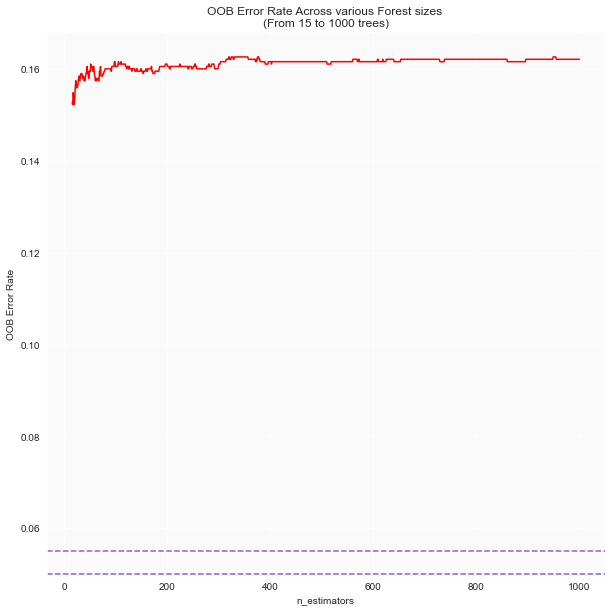

In [98]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [108]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators= 421,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=50,
                       n_estimators=421, random_state=42)

In [109]:
fit_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=50,
                       n_estimators=421, random_state=42)

In [110]:
predictions_rf = fit_rf.predict(x_test)

## Performance Metrics

In [111]:
accuracy_rf = fit_rf.score(x_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.849


In [103]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.1494


### AUC

In [112]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(x_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

In [116]:
auc_rf = auc(fpr2, tpr2)

In [117]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

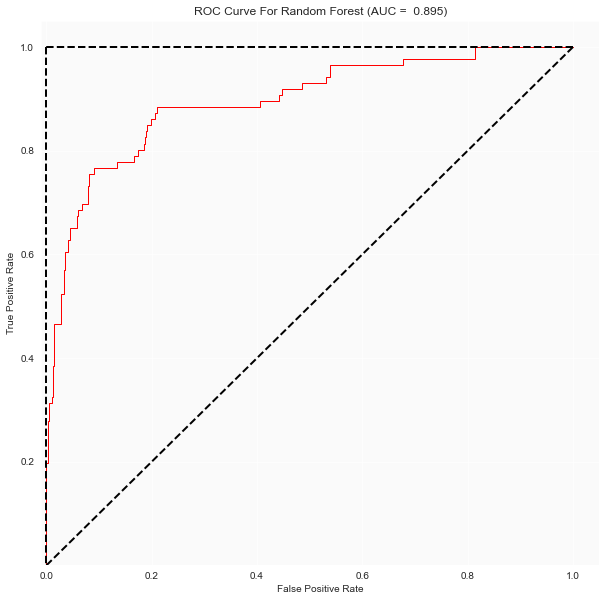

In [118]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

### Classification Report

In [123]:
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            y_test))

In [124]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.84      0.92       469
           1       0.15      1.00      0.26        13

    accuracy                           0.85       482
   macro avg       0.58      0.92      0.59       482
weighted avg       0.98      0.85      0.90       482



# REPORT

In [126]:
from sklearn import tree

In [129]:
visual = tree.DecisionTreeClassifier(random_state=1, max_depth=4, criterion = "gini",
                                    min_samples_split = 95, min_samples_leaf = 37)

visual.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=37, min_samples_split=95,
                       random_state=1)

[Text(690.525, 1467.72, 'OverTime <= 0.487\ngini = 0.291\nsamples = 1924\nvalue = [1584, 340]\nclass = y[0]'),
 Text(251.10000000000002, 1141.56, 'WorkLifeBalance <= -1.784\ngini = 0.202\nsamples = 1377\nvalue = [1220, 157]\nclass = y[0]'),
 Text(167.4, 815.4000000000001, 'gini = 0.45\nsamples = 73\nvalue = [48, 25]\nclass = y[0]'),
 Text(334.8, 815.4000000000001, 'YearsAtCompany <= -0.75\ngini = 0.182\nsamples = 1304\nvalue = [1172, 132]\nclass = y[0]'),
 Text(167.4, 489.24, 'Age <= -0.333\ngini = 0.308\nsamples = 326\nvalue = [264, 62]\nclass = y[0]'),
 Text(83.7, 163.08000000000015, 'gini = 0.443\nsamples = 163\nvalue = [109, 54]\nclass = y[0]'),
 Text(251.10000000000002, 163.08000000000015, 'gini = 0.093\nsamples = 163\nvalue = [155, 8]\nclass = y[0]'),
 Text(502.20000000000005, 489.24, 'Age <= 1.276\ngini = 0.133\nsamples = 978\nvalue = [908, 70]\nclass = y[0]'),
 Text(418.5, 163.08000000000015, 'gini = 0.108\nsamples = 857\nvalue = [808, 49]\nclass = y[0]'),
 Text(585.9, 163.0800

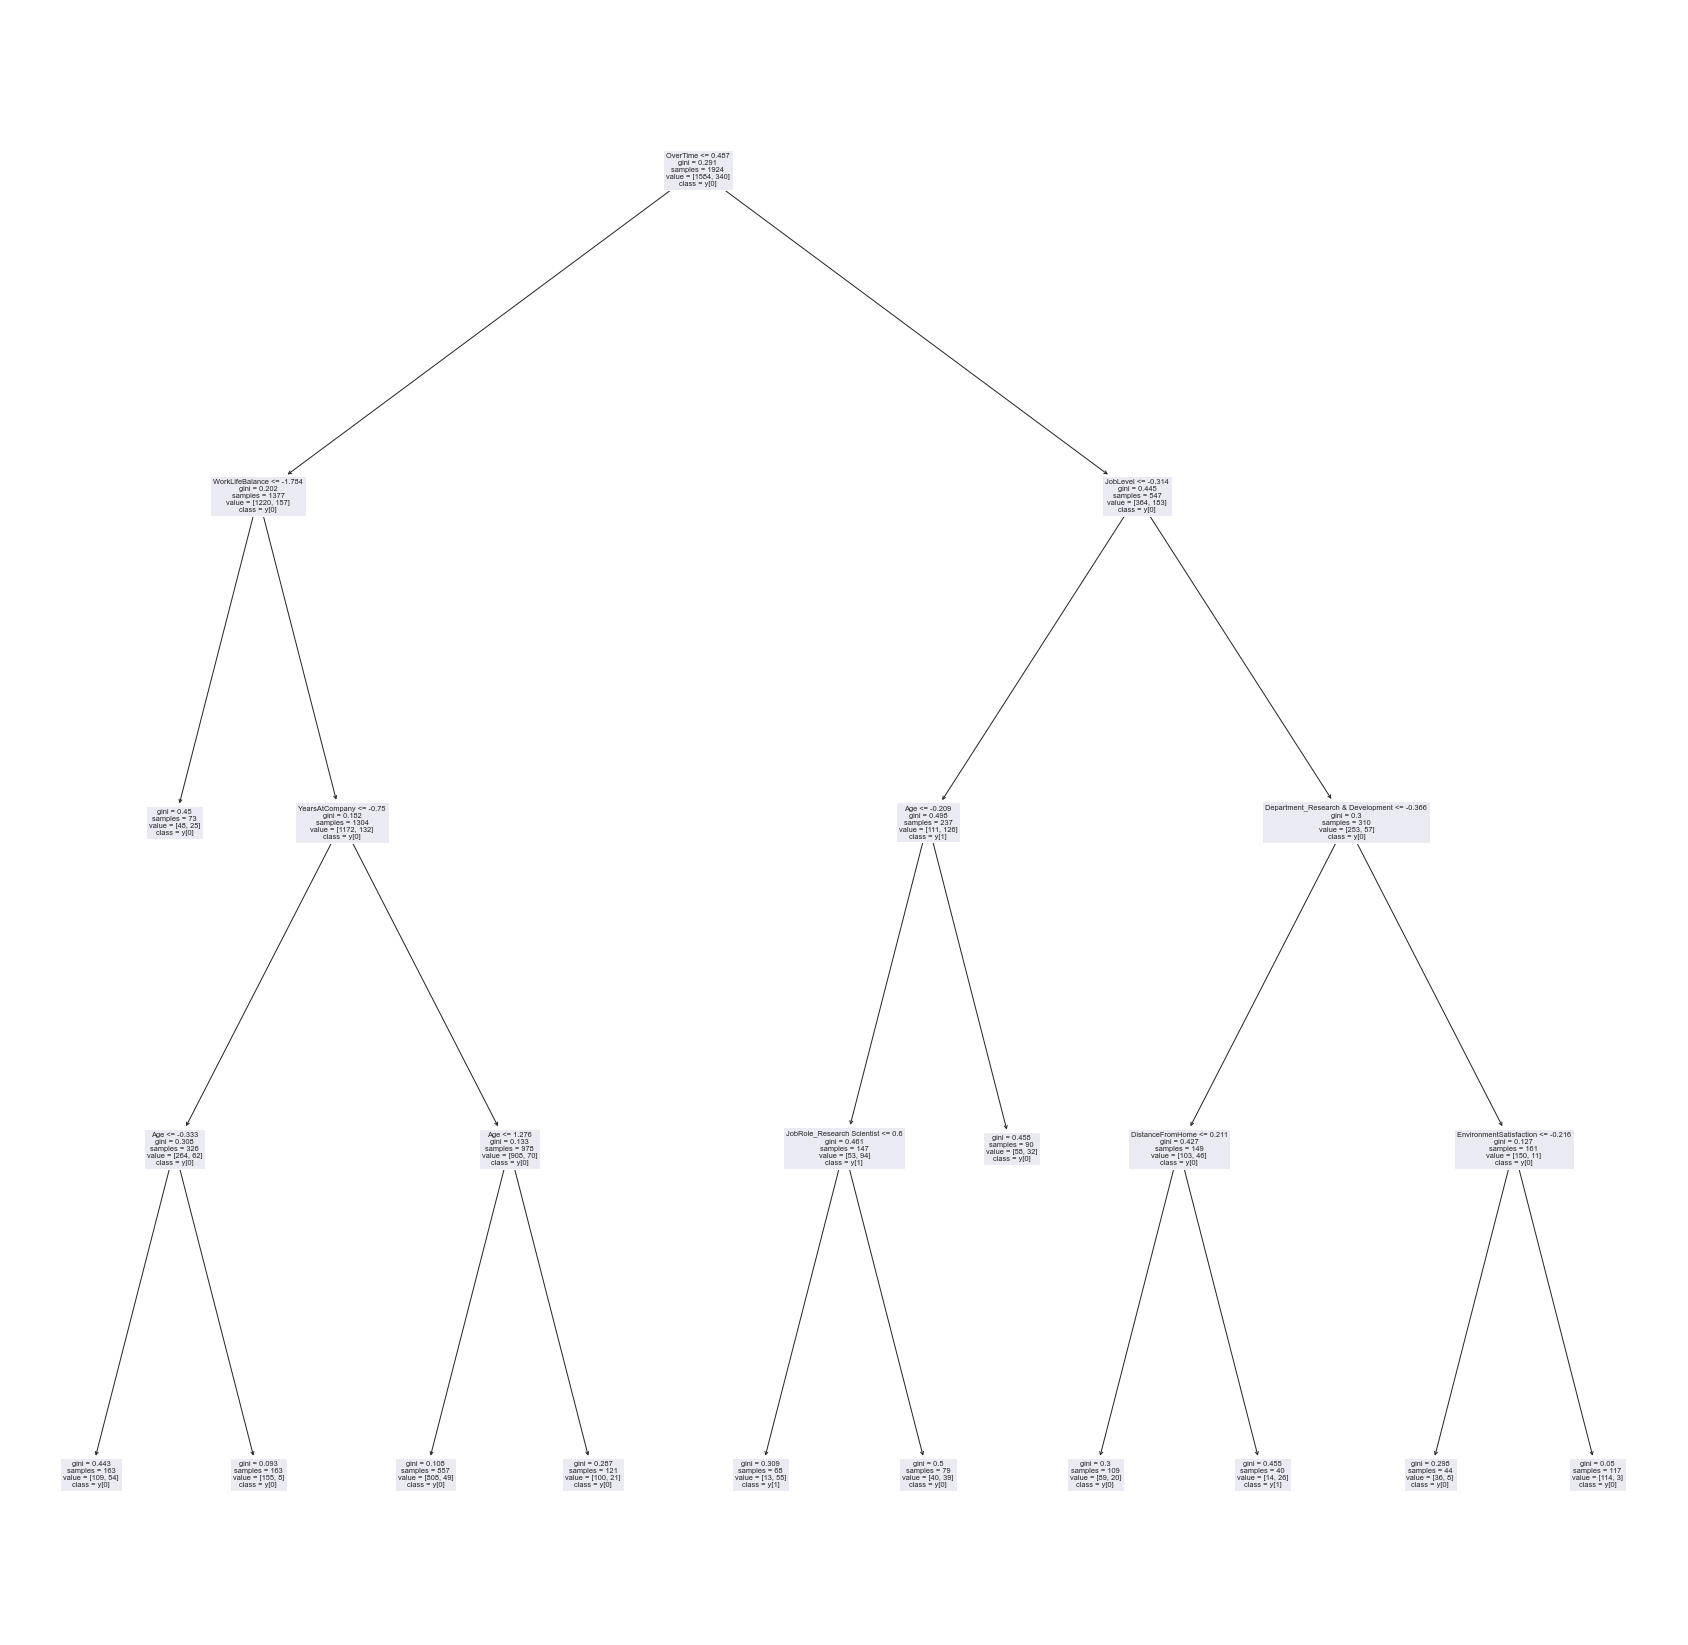

In [131]:
_, ax = plt.subplots(figsize=(30,30)) # Resize figure
tree.plot_tree(visual, class_names = True, feature_names = list(emp_attrition_model.columns))